In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dfTrain=pd.read_csv("Documents/train.csv")

In [5]:
# check the columns
dfTrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# describing the saleprice variable
dfTrain['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

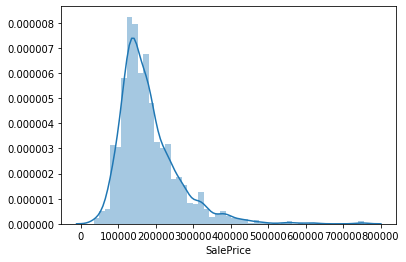

In [7]:
# a histogram on it
sns.distplot(dfTrain['SalePrice'])

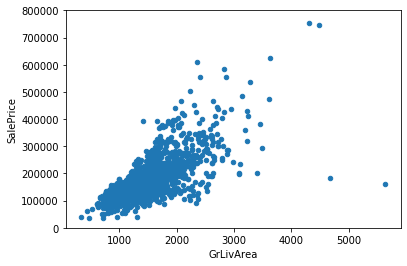

In [9]:
# relationship with numerical variables
# scatterplot
var='GrLivArea'
data=pd.concat([dfTrain['SalePrice'],dfTrain[var]],axis=1)
data.plot.scatter(var,'SalePrice',ylim=(0,800000));

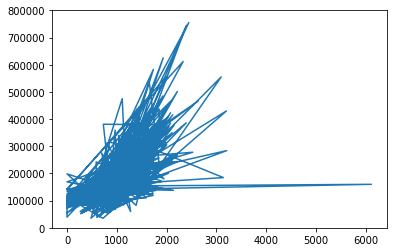

In [18]:
plt.plot(dfTrain['TotalBsmtSF'],dfTrain['SalePrice'])
plt.ylim(0,800000);

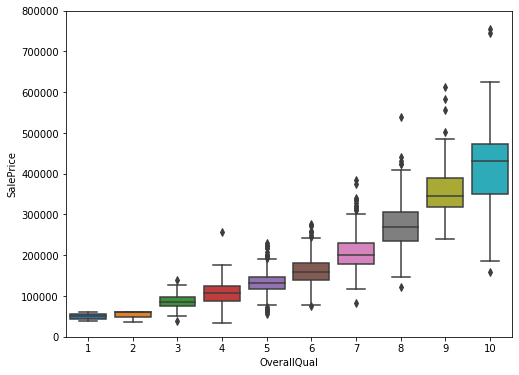

In [19]:
# relationship with categoricalvariabes
#boxplot
fig,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(dfTrain['OverallQual'],dfTrain['SalePrice'])
fig.axis(ymin=0,ymax=800000);

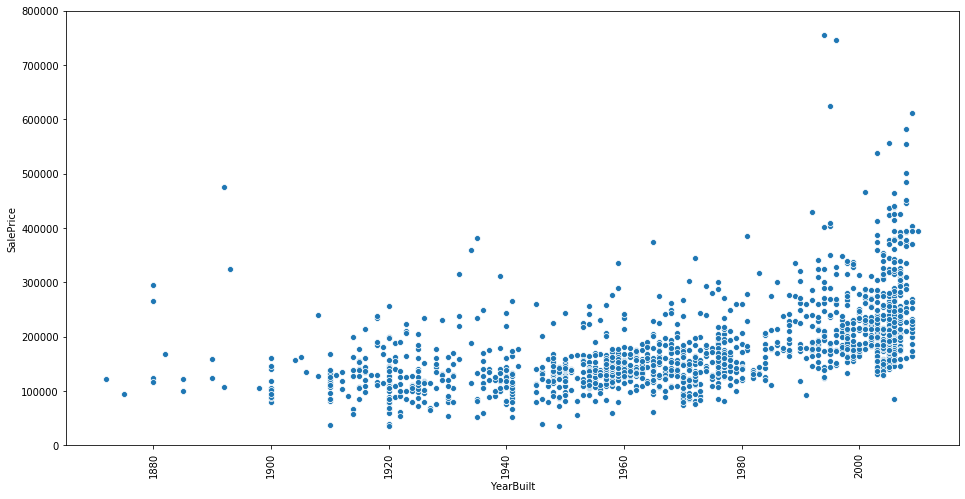

In [21]:
fig,axis=plt.subplots(figsize=(16,8))
fig=sns.scatterplot(dfTrain['YearBuilt'],dfTrain['SalePrice'])
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90);

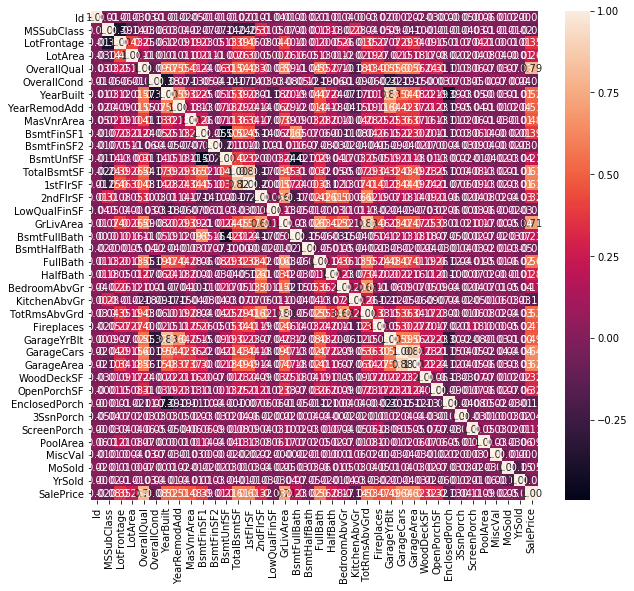

In [23]:
f,ax=plt.subplots(figsize=(10,9))
f=sns.heatmap(dfTrain.corr(),annot=True,fmt='.2f');

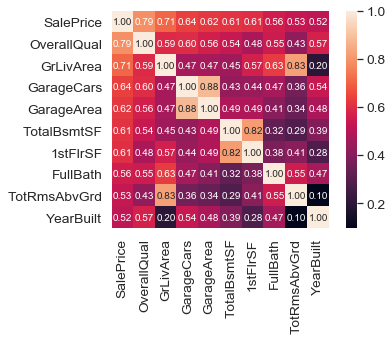

In [26]:
#saleprice correlation matrix (zoomed heatmap)
k = 10 #number of variables for heatmap
corrmat=dfTrain.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dfTrain[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

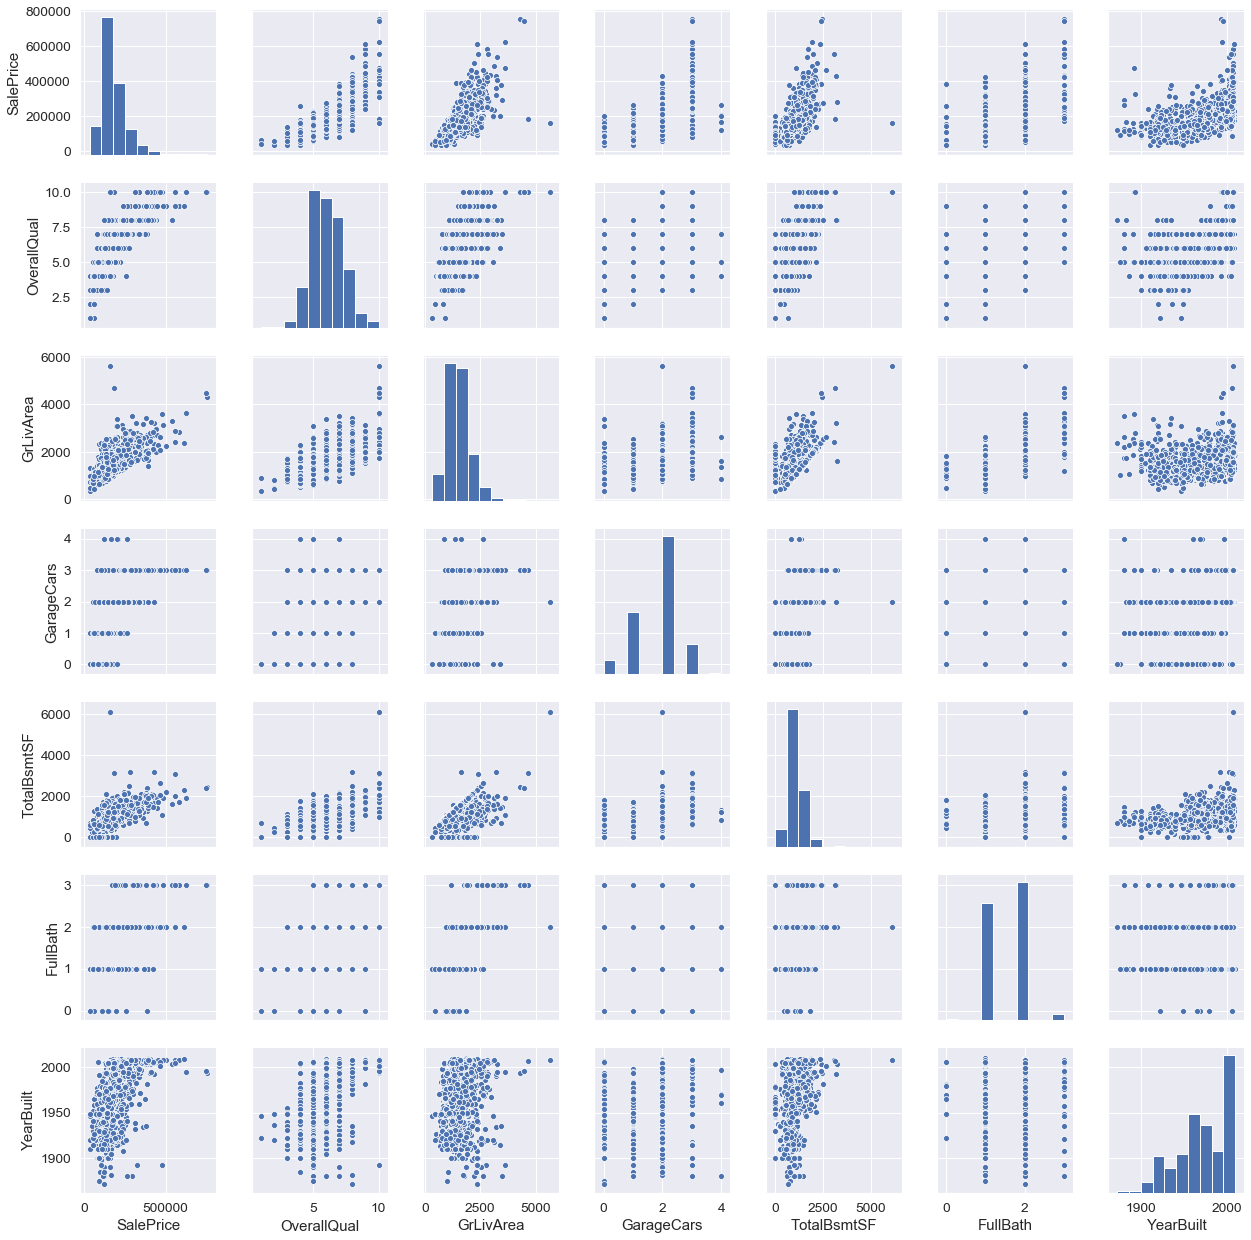

In [28]:
#pairplot
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF',
      'FullBath','YearBuilt']
sns.pairplot(dfTrain[cols],size=2.5);

In [30]:
# Missing Data
total=dfTrain.isnull().sum().sort_values(ascending=False)
percent=dfTrain.isnull().sum()/dfTrain.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
3SsnPorch,0,0.000000
Alley,1369,0.937671
BedroomAbvGr,0,0.000000
BldgType,0,0.000000
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinSF1,0,0.000000
BsmtFinSF2,0,0.000000


In [39]:
# we will delete all the missing data variables 
#and the one observation in 'electrical'
dfTrain=dfTrain.drop(missing_data[missing_data['Total']>1].index,1)
dfTrain=dfTrain.drop(dfTrain.loc[dfTrain['Electrical'].isnull()].index)
dfTrain.isnull().sum().max()


0

In [46]:
#looking at the outliers
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(dfTrain['SalePrice']
[:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


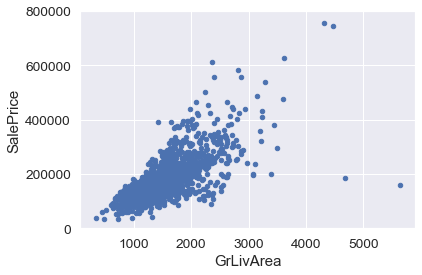

In [49]:
#Bivariate analysis saleprice/grlivarea
var='GrLivArea'
data=pd.concat([dfTrain['SalePrice'],dfTrain[var]],axis=1)
data.plot.scatter(var,'SalePrice',ylim=(0,800000));

# Normality

- am going to use histograms and a normal probability plot

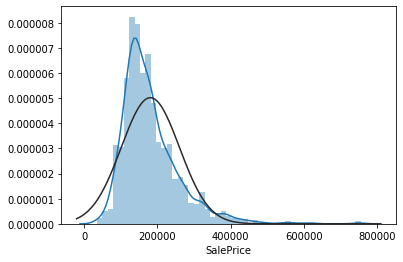

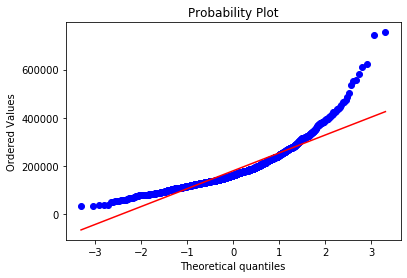

In [4]:
sns.distplot(dfTrain['SalePrice'],fit=norm);
fig=plt.figure()
res=stats.probplot(dfTrain['SalePrice'],plot=plt)